In [1]:
!pip install -U kaleido

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import pandas as pd

In [3]:
mode = 'jupyter' #colab
render = 'image' #image

In [4]:
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.offline import iplot

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

if mode == 'colab':
    import cufflinks as cf
    cf.go_offline()
    init_notebook_mode(connected=False)

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Config for Colab
def configure_plotly_browser_state():
    import IPython
    display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))

In [5]:
if render == 'image':
    import plotly.io as pio
    pio.renderers.default = 'png'

# Statistics - Hypothesis Testing


Hypothesis the process of testing an idea using statistics. An idea must be testable. For example, if we have a idea 'the price of apples in a city is expensive' - this idea is not testable unless we have something to compare it with. But if we change the idea to 'the price of apples in a city is greater than or equal to $\$$1.75' - in this case we can test the idea since we can compare it with a price. So, the idea then becomes a hypothesis.

To perform hypothesis testing, we follow the steps mentioned below:

- Generate a testable idea

- Design an experiment to test the hypothesis

- Collect the result of the experiment

- Analyze the result

Hypothesis are of two types:

- **Null Hypothesis:** In hypothesis testing, null hypothesis is the hypothesis that we want to test. For our above example, the null hypothesis will be 'the price of apples in a city is greater than or equal to 1.75'. It is denoted by $H_0$

- **Alternate Hypothesis:** All results that are not included in null hypothesis falls under alternate hypothesis. For our above example, the alternate hypothesis will be 'the price of apples in a city is less than $\$$1.75'. It is dentoted by $H_A$ or $H_1$.

\begin{equation}
H_0 : \mu_0 \geq 1.75 \\
H_1: \mu_1 < 1.75
\end{equation}

During a test, we try to disprove the null hypothesis. $H_0$ is considered true until proved otherwise. 

**In statistics, null hypothesis is the statement that we are trying to reject.**

Hypothesis testing are of two types:

- **Two-tailed test:** In hypothesis testing, if a test allow for the possibility of an effect in two direction, then the test is known as two-tailed test.

As for example, if our null hypothesis is - The mean salary of a data scientist is $\$$ 100,000. In this case, we consider the probability distribution of the salaries:

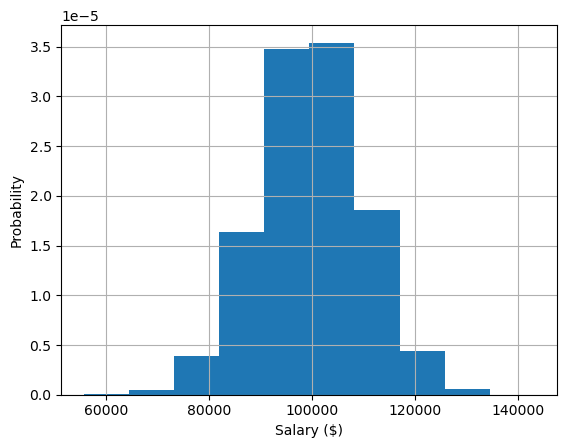

In [6]:
null_hypothesis = 100_000
samples = np.random.normal(loc=null_hypothesis, scale=10_000, size=10000)
plt.figure()
plt.hist(samples, density=True)
plt.grid()
plt.xlabel("Salary ($)")
plt.ylabel("Probability")
plt.show()

The alternative hypothesis is - The mean salary is either greater than or less than $\$$ 100,000. If the null hypothesis is wrong, the actual mean salary can either be on the left side of 100,000 in the distribution or it can be in the right side. Since the effect can be on two sides, these type of test is known as two-tailed test. It is also known as two-sided test.

- **One-tailed test:** In hypothesis testing, if a test allow for the possibility of an effect in one direction, then the test is known as one-tailed test.

For example, if the null hypothesis is, 'The mean salary of data scientist is **greater than or equal to** $\$$ 100,00' - in this case if the null hypothesis is wrong then the actual mean will be somewhere on left side of $\$$ 100,000 in the distribution. So, these type of test is known as one-tailed test or one-sided test.

## Signficance Level

In statistics, we are try to reject a null hypotheis. However, there is always a small possibility that we make an error and reject a null hypothesis that is true. The probability of rejecting a null hypothesis that is true, is known as significance level. It is denoted by $\alpha$.

It is the complement of confidence level. The typical values for $\alpha$ are 0.01, 0.05, and 0.1. This value is selected during the experiment based on the requirements of the task.

### Z-Test (Two-tailed test)

Suppose, we have the following hypothesis - The average grade of students in a college is $70\%$ i.e.

\begin{equation}
H_0 : \mu_0 = 0.70 \\
H_1: \mu_1 \neq 0.70
\end{equation}

We assume that the grades are normally distributed. To test this hypothesis we can perform a z-test. The equation of a z-test is as follows:

\begin{equation}
Z = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}
\end{equation}

Here,
- $\bar{x}$ is the sample mean
- $\mu$ is the population mean i.e. $70\%$
- $s$ is the standard deviation of the sample
- $n$ is the sample size
- $\frac{s}{\sqrt{n}}$ is the standard error

If the mean of our sample is close to zero, then the value of 'Z' is close to zero. So, lower value of z means that we accept the null hypothesis. But what should the significance level be. Suppose, we assume that the signficance level is 0.05. In that case the graph will will look like:

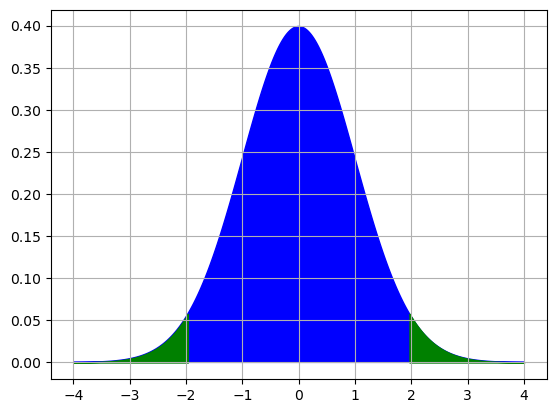

In [7]:
alpha = 0.05
x = np.linspace(-4, 4, 1000)
density = stats.norm.pdf(x)
critical_value = stats.norm.ppf(1 - alpha/2)
left_indices = np.where(x <= -critical_value)[0]
right_indices = np.where(x >= critical_value)[0]

plt.figure()
plt.fill(x, density, color='blue')
plt.fill_between(x[left_indices], density[left_indices], color='green')
plt.fill_between(x[right_indices], density[right_indices], color='green')
plt.grid()
plt.show()

For a standard normal distribution, the mean is 0 and the standard deviation is 1. So, for $alpha=0.05$, the z-score will be 
\begin{equation}
Table(1 - \frac{\alpha}{2}) = Table(0.975) - 1.9 + 0.6 = 1.96
\end{equation}

Since the test is a two-tailed test, if our calculated grade lies in a region outside some value on the left or in a region outside some value on the right, we will consider the null hypothesis to be as false. We calculated the critical value to be 2.5. Therefore, if our result is below $-1.96$ or above $1.96$ we will consider the null hypothesis to be false. The region is colored in green in the above distribution. This region is known as **rejection region** because we will reject the null hypothesis if our result falls within this region.

To perform the test we take the following steps:

- Create a distribution of sample grades.
- We compute the 'Z statistic' using the equation $\frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}$
- We choose a significance level $\alpha$.
- We calculate the critical value.

If the z-statistic result is below the minimum critical value or above the maximum critical value, we consider the null hypothesis to be false. Otherwise we consider it to be correct.

In [8]:
def calculate_z_score(sample_mean, hypothesized_mean, sample_standard_deviation, sample_size):
    standard_error = sample_standard_deviation/np.sqrt(sample_size)
    return (sample_mean - hypothesized_mean)/standard_error

hypothesis_mean_grade = 0.70
sample_student_grades = [0.4, 0.6, 0.5, 0.1, 0.4, 0.7, 0.9, 0.8, 0.85, 0.9, 0.7, 0.63]

# Calculate sample mean
sample_mean = np.mean(sample_student_grades)
sample_standard_deviation = np.std(sample_student_grades)
sample_size = len(sample_student_grades)
significance_level = 0.05

z_score = calculate_z_score(sample_mean, hypothesis_mean_grade, sample_standard_deviation, sample_size)
critical_value = stats.norm.ppf(1-(significance_level)/2)

print(f"The z-score is {z_score} and the critical value is {critical_value}")
accepted = -critical_value <= z_score <= critical_value
result = "accept" if accepted else "reject"
result_range = "within" if accepted else "outside"
print(f"The z-score is {result_range} the range of critical value. So, with a significance level of {significance_level}, we {result} the null hypothesis")

The z-score is -1.15282548323108 and the critical value is 1.959963984540054
The z-score is within the range of critical value. So, with a significance level of 0.05, we accept the null hypothesis


### Z-Test (One-tailed test)

Suppose we have the following hypothesis - The average salary of a data scientist is more than $\$$125,000. So, the hypothesis becomes:

\begin{equation}
H_0 : \mu_0 \geq \$125,000 \\
H_1: \mu_1 < \$125,000
\end{equation}

If the value of our calculation is greater than or equal to 125,000, we accept the null hypothesis. However, if our result is less than $x = 125,000$ where 'x' is a critical value threshold, then we reject the null hypothesis. So, this time the rejection region is only on left of the distribution i.e. it is on one side.

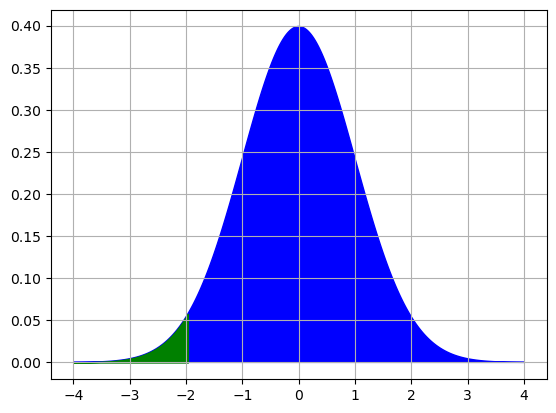

In [9]:
alpha = 0.05
x = np.linspace(-4, 4, 1000)
density = stats.norm.pdf(x)
critical_value = stats.norm.ppf(1 - alpha/2)
left_indices = np.where(x <= -critical_value)[0]

plt.figure()
plt.fill(x, density, color='blue')
plt.fill_between(x[left_indices], density[left_indices], color='green')
plt.grid()
plt.show()

If we consider a significance level ($\alpha$) of 0.05, the equation to calculate the critical value from the z-table will be 

\begin{equation}
Table(1 - \alpha) = Table(0.95) - 1.6 + 0.04 = 1.64
\end{equation}

Since the test is one-tailed we have considered $1-\alpha$ instead of $1-\frac{\alpha}{2}$. Therefore, if our z-score is below $-1.64$, we will reject the null hypothesis.

In [10]:
hypothesis_mean_salary = 125_000
sample_salaries = [70_000, 50_000, 75_000, 80_000, 90_000, 80_000, 70_000, 65_000, 80_000]


# Calculate sample mean
sample_mean = np.mean(sample_salaries)
sample_standard_deviation = np.std(sample_salaries)
sample_size = len(sample_salaries)
significance_level = 0.05

z_score = calculate_z_score(sample_mean, hypothesis_mean_salary, sample_standard_deviation, sample_size)
critical_value = stats.norm.ppf(1 - significance_level)

print(f"The z-score is {z_score} and the critical value is {critical_value}")
accepted = z_score >= -critical_value
result = "accept" if accepted else "reject"
result_range = "within" if accepted else "outside"
print(f"The z-score is {result_range} the range of critical value. So, with a significance level of {significance_level}, we {result} the null hypothesis")

The z-score is -14.350211546474549 and the critical value is 1.6448536269514722
The z-score is outside the range of critical value. So, with a significance level of 0.05, we reject the null hypothesis


In the above example, our z-score is $-14.3$ and the critical value is $-1.64$. Since, the z-score falls outside the range of our critical value we can reject the null hypothesis.

## Type I Errors


**Type I** error is an error that we make when we **reject a true null** hypothesis. This is also known as **false positive**. 

The probability of making this error is $\alpha$ i.e. the level of significance. If we choose a wrong significance level then this error may occur. 


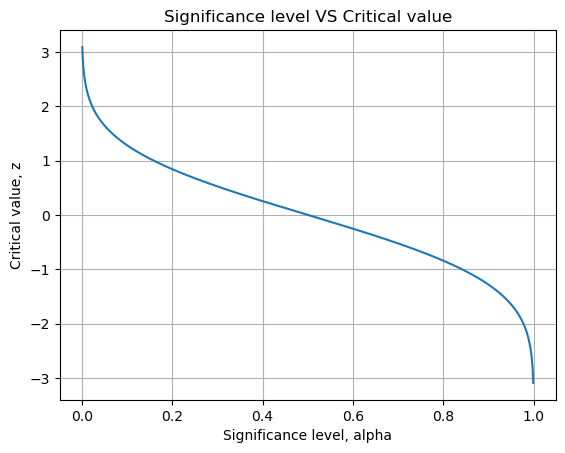

In [11]:
one_minus_alpha = np.arange(0, 1, 0.001)
critical_values = stats.norm.ppf(one_minus_alpha)

fig, ax = plt.subplots()

ax.plot(1- one_minus_alpha, critical_values, label='critical value')
ax.set_xlabel("Significance level, alpha")
ax.set_ylabel("Critical value, z")

plt.grid()
plt.title("Significance level VS Critical value")
plt.show()

If we choose a very low significance level, the value of $1-\alpha$ increases. If this increases, then the critical value increases. 
As the critical value increases, the range of acceptance region becomes wider as the rejection region becomes narrower. 

If the range of acceptance region is wider, then there is a higher possibility that the true population mean (predicted by null hypothesis) may within the acceptance range. 


## Type II Errors


**Type II** error is an error that we make when we **accept a false null** hypothesis. This is also known as **false negative**. 

The probability of making this error is $\beta$. This type of error occurs due to sample size and variance. The probability of rejecting a false null hypothesis is $1-\beta$. This error can be reduced by increasing the sample size.


## Test for Mean with known population variance

In this example we will test the following hypothesis - The average salary of a data scientis is equal to $\$$ 92,000.

\begin{equation}
H_0 : \mu_0 = \$ 92,000 \\
H_1: \mu_1 \neq \$ 92,000
\end{equation}

Our sample dataset contains the salary of data scientists. The population variance $\mu$ will be equal to the value of our null hypothesis i.e $\$$ 92,000. Since the population variance is known, we will consider the population standard deviation $\sigma$ to be $\$$ 15,000.

Since the critical value can affect two sides of a distribution, this is a two-tailed test.

In [12]:
df = pd.read_excel('data_scientist_salary.xlsx')
df.info()
df.head()

population_standard_deviation = 15_000
population_mean_of_interest = 92_000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Salary  30 non-null     int64
dtypes: int64(1)
memory usage: 368.0 bytes


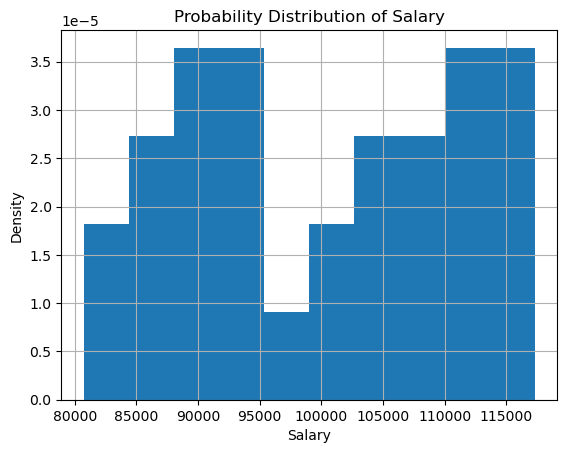

In [13]:
plt.figure()
plt.hist(df['Salary'], density=True)
plt.grid()
plt.title("Probability Distribution of Salary")
plt.xlabel("Salary")
plt.ylabel("Density")
plt.show()

### Task 1 - Standardize the distribution

First we need to standardize the distribution by calculating the Z-score. The equation to calculate the Z-score is as follows:

\begin{equation}
Z = \frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}}
\end{equation}

Here,
- '$\bar{x}$' is the sample mean
- '$\mu$' is the mean of interest from the null hypothesis
- '$\sigma$' is the population standard deviation
- 'n' is the sample size

In this way we obtain a distribution with mean $x - \mu$ and standard deviation '1'. Therefore, we can then compare the data with the Z-table. As the data of Z-table is for a standard normal distribution with mean 0 and standard deviation 1, the closer our value $\bar{x}-\mu$ is to zero, the more accurate is the null hypothesis.

In [14]:
standard_error = population_standard_deviation/np.sqrt(len(df))
print(f"Standard error is {standard_error}")

z_score = (np.mean(df['Salary']) - population_mean_of_interest)/standard_error

print(f"The Z-score is {z_score}")

Standard error is 2738.6127875258308
The Z-score is 2.9943505354311877


### Task 2 - Compare the Z-score with critical value

Now we will calculate the critical value 'z' from the Z-statistics table using a significance level of 0.05. If the z-score is less than -z or greater than +z, then we will reject the null hypothesis. Otherwise, we will accept the null hypothesis. Since, this is a two-tailed test, the data from z-table will be calculated using $1-\frac{\alpha}{2}$.

**Note**

We use the absolute value $|Z|$ of the z-score instead of the actual value since some z-statistics tables do not contain data for negative values and it is easier to compare the positive values. So, if we use the absolute value to calculate the critical value, we can just check whether the z-score is greater than critical value and omit the test for negative range. That is because $-Z < -z$ is the same as $Z > z$

In [15]:
alpha = 0.05
critical_value = stats.norm.ppf(1 - (alpha/2))
print(f"The critical value is {critical_value}")

accepted = np.abs(z_score) <= np.abs(critical_value)
result = "accept" if accepted else "reject"
result_range = "within" if accepted else "outside"
print(f"The z-score is {result_range} the range of critical value. So, with a significance level of {alpha*100}%, we {result} the null hypothesis")

The critical value is 1.959963984540054
The z-score is outside the range of critical value. So, with a significance level of 5.0%, we reject the null hypothesis


As we reduce the value of significance level i.e. increase the confidence interval, the acceptance range of the distribution becomes wider as the critical value decreases. So, the possibility of accepting the null hypothesis also increases. As for example, we increase the confidence level to 99.9\%, the significance level becomes $1-0.999=0.001$. In that case,

In [16]:
alpha = 0.001
critical_value = stats.norm.ppf(1 - (alpha/2))
print(f"The critical value is {critical_value}")

accepted = np.abs(z_score) <= np.abs(critical_value)
result = "accept" if accepted else "reject"
result_range = "within" if accepted else "outside"
print(f"The z-score is {result_range} the range of critical value. So, with a significance level of {alpha*100}%, we {result} the null hypothesis")

The critical value is 3.2905267314919255
The z-score is within the range of critical value. So, with a significance level of 0.1%, we accept the null hypothesis


Therefore, if we keep decreasing the signifcance level, there **may** come a point when we can no longer reject the null hypothesis. There is a method to calculate the **significance level below which we can no longer reject the null hypothesis.** We find this by calculating the **P-Value**.

## P-Value

This is the minimum value of a significance level of a test **after** which we can no longer reject the null hypothesis. P-value is the last significance level at which we can reject a null hypothesis. Therefore, the higher the P-Value of a test, it is more likely that the null hypothesis is correct.

When testing, we calculate the p-value of a distribution. We then choose a signifance level $\alpha$. If the p-value is lower than $\alpha$, we can reject the null hypothesis at that significance level because if the value of alpha is lower than p-value only then we can no longer reject the null hypothesis. 

### Calculating the P-value

1. In the above example, our hypothesis was - the average salary of a data scientist is $\$$ 92,000 and we rejected the hypothesis at a significance level of 5\%. To calculate the p-value, we first find the z-score of the distribution. In our case the z-score is $2.99$.

2. Next we lookup the Z-statistics table and find the cell $c$ whose sum of the row and column header equals to 2.99. If we cannot find such cell, we choose the cell that has the sum nearest to 2.99.

3. If the test is two-sided, then $(1-c)*2$ provides us the p-value. If the test is one-sided, then $1-c$ provides us the p-value. 


For our example, the cell whose sum of row and column header is equal to $2.99$ is $0.9986$. So, the p-value for our example is $(1-0.9986)*2 = 0.0027$. Therefore, **for significance level below 0.2\%, we can no longer reject our null hypothesis.**

**Since the main objective of a test is to reject the null hypothesis, the closer p-value is to zero, the better is the outcome of the test. Usually, p-value with three zeros after the decimal point is considered better since there is a higher chance of rejecting the null hypothesis.**

**P-Value is a measure that works for all type of distributions.**

## Test for Mean with unknown population variance

Let us consider the hypothesis - More than 40\% of customers of a company opens marketing emails from the company. We are trying to prove that this hypothesis is correct. Since we are trying to prove this point, the opposite statement will become the null hypothesis. In this case the hypothesis becomes:

\begin{equation}
H_0 : \mu_0 \leq 40\% \\
H_1: \mu_1 > 40\%
\end{equation}

Since the rejection region can be only on one side of the distribution, this is considered a one-tailed test. We will reject the null hypothesis if the significance level is at least 5\% i.e. $\alpha=0.05$. We assume that the population open rate of emails is normally distributed.

In [17]:
population_mean_of_interest = 40

df = pd.read_excel('email_open_rate.xlsx')
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Open rate  10 non-null     int64
dtypes: int64(1)
memory usage: 208.0 bytes


,Open rate
0,26
1,23
2,42
3,49
4,23
5,59
6,29
7,29
8,57
9,40


In [18]:
sample_mean = np.mean(df['Open rate'])
standard_deviation = np.std(df['Open rate'])

print(f"The sample mean is {sample_mean:.2f} and the sample standard_deviation is {standard_deviation:.2f}")

The sample mean is 37.70 and the sample standard_deviation is 13.03


### Task 1 - Standardize the distribution

**Since we have a small sample and an unknown variance, we will use the T-statistics to test our hypothesis.** 

The equation to calculate the T-score is as follows:

\begin{equation}
T = \frac{\bar{x} - \mu}{\frac{s}{\sqrt{n}}}
\end{equation}

Here,
- '$\bar{x}$' is the sample mean
- '$\mu$' is the mean of interest from the null hypothesis
- '$s$' is the sample standard deviation
- 'n' is the sample size



In [19]:
standard_error = standard_deviation/np.sqrt(len(df))
print(f"The standard error is {standard_error}")
t_score = (sample_mean - population_mean_of_interest)/standard_error
print(f"The T-score is {t_score:.2f}")

The standard error is 4.120800893030382
The T-score is -0.56


Since it is easier to compare using absolute value, we will use the absolute value of the T-Score and critical value for comparison.

### Task 2 - Compare the T-score with critical value

Now we will calculate the critical value 't' from the T-statistics table using a significance level of 0.05 and $n-1$ degrees of freedom i.e. $10-1=9$ degrees of freedom. If the t-score is less than -t or greater than +t, then we will reject the null hypothesis. Otherwise, we will accept the null hypothesis. Since, this is a one-tailed test, the data from t-table will be calculated using $1-\alpha$.

**Note**

We use the absolute value $|T|$ of the t-score instead of the actual value since some t-statistics tables do not contain data for negative values and it is easier to compare the positive values. So, if we use the absolute value to calculate the critical value, we can just check whether the t-score is greater than critical value and omit the test for negative range. That is because $-T < -t$ is the same as $T > t$

In [20]:
alpha = 0.05
degree_of_freedom = len(df) - 1
critical_value = stats.t.ppf(1-alpha, degree_of_freedom)
print(f"The critical value is {critical_value:.2f}")

accepted = np.abs(t_score) <= np.abs(critical_value)
result = "accept" if accepted else "reject"
result_range = "within" if accepted else "outside"
print(f"The t-score is {result_range} the range of critical value. So, with a significance level of {alpha*100}%, we {result} the null hypothesis")

The critical value is 1.83
The t-score is within the range of critical value. So, with a significance level of 5.0%, we accept the null hypothesis


Since the T-score is 0.56 is less than the critical value 1.83, we accept the null hypothesis at a significance level of 5\%.

### Task 3 - Calculate P-Value

The T-score is 0.56. So, we find the cell in where the index of the row is equal to the degree of freedom and the cell which has the value nearest to the T-score. For our case it is 0.700. So, the P-Value is $1-0.7=0.3$. Since the p-value is greater than the significance level $0.05$, we can accept the null hypothesis. 

Therefore, at a significance level of 5\%, the email open rate of the customers is less than or equal to 40\%.

## Test for Mean - Dependent Samples

Let us consider the hypothesis - The level of magnesium increases after the administration of a medication. We are trying to prove that this hypothesis is correct. Since we are trying to prove this point, the opposite statement will become the null hypothesis. In this case the hypothesis becomes:

\begin{equation}
H_0 : \mu_{after} - \mu_{before} < 0 \\
H_1: \mu_{after} - \mu_{before} \geq 0
\end{equation}

Since the rejection region can be only on one side of the distribution, this is considered a one-tailed test. We will reject the null hypothesis if the significance level is at least 5\% i.e. $\alpha=0.05$. We assume that the population is normally distributed.

Let us denote $\mu_{after} - \mu_{before}$ as the difference of the population mean $\mu_{D_0}$ for null hypothesis $H_0$ and $\mu_{D_1}$ for alternative hypothesis $H_1$. Therefore, the hypothesis becomes:

\begin{equation}
H_0 : \mu_{D_0} < 0 \\
H_1: \mu_{D_1} \geq 0
\end{equation}

In [21]:
df = pd.read_excel('blood_magnesium_level.xlsx')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Before  10 non-null     float64
 1   After   10 non-null     float64
dtypes: float64(2)
memory usage: 288.0 bytes


,Before,After
0,2.0,1.7
1,1.4,1.7
2,1.3,1.8
3,1.1,1.3
4,1.8,1.7


In [22]:
df['D'] = df['After'] - df['Before']
df.head()

,Before,After,D
0,2.0,1.7,-0.3
1,1.4,1.7,0.3
2,1.3,1.8,0.5
3,1.1,1.3,0.2
4,1.8,1.7,-0.1


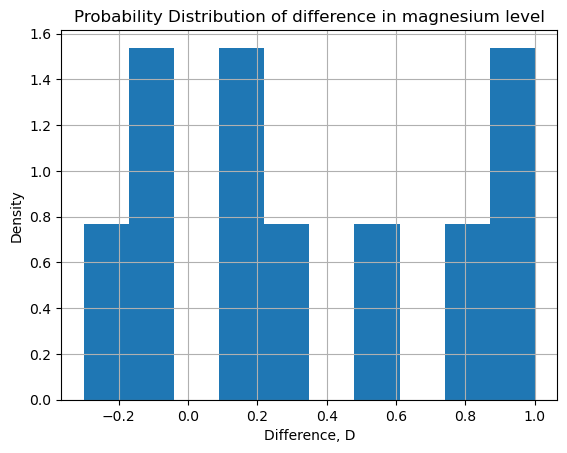

In [23]:
plt.figure()
plt.hist(df['D'], density=True)
plt.grid()
plt.title("Probability Distribution of difference in magnesium level")
plt.xlabel("Difference, D")
plt.ylabel("Density")
plt.show()

### Task 1 - Standardize the distribution

Since the sample size is small and the population variance is unknown, we will use the T-statistics instead of the Z-statistics. First we need to standardize the distribution by calculating the T-score. The equation to calculate the T-score is as follows:

\begin{equation}
T = \frac{\bar{x_D} - \mu_D}{\frac{s_D}{\sqrt{n}}}
\end{equation}

Here,
- '$\bar{x_D}$' is the sample mean of the differences
- '$\mu_D$' is the mean of interest from the null hypothesis i.e. 0
- '$s_D$' is the sample standard deviation of the difference
- 'n' is the sample size



In [24]:
sample_mean = np.mean(df['D'])
sample_standard_deviation = np.std(df['D'])
population_mean_of_interest = 0
alpha = 0.05
degree_of_freedom = len(df) - 1

standard_error = sample_standard_deviation/np.sqrt(len(df))

print(f"The standard error is {standard_error}")

t_score = (sample_mean - population_mean_of_interest)/standard_error

print(f"The T-score is {t_score}")

The standard error is 0.13641847382227967
The T-score is 2.4190272091000686


Since it is easier to compare using absolute value, we will use the absolute value of the T-Score and critical value for comparison.

### Task 2 - Compare the T-score with critical value

Now we will calculate the critical value 't' from the T-statistics table using a significance level of 0.05 and $n-1$ degrees of freedom i.e. $10-1=9$ degrees of freedom. If the t-score is less than -t or greater than +t, then we will reject the null hypothesis. Otherwise, we will accept the null hypothesis. Since, this is a one-tailed test, the data from t-table will be calculated using $1-\alpha$.

**Note**

We use the absolute value $|T|$ of the t-score instead of the actual value since some t-statistics tables do not contain data for negative values and it is easier to compare the positive values. So, if we use the absolute value to calculate the critical value, we can just check whether the t-score is greater than critical value and omit the test for negative range. That is because $-T < -t$ is the same as $T > t$

In [25]:
critical_value = stats.t.ppf(1-alpha, degree_of_freedom)
print(f"The critical value is {critical_value:.2f}")

accepted = np.abs(t_score) <= np.abs(critical_value)
result = "accept" if accepted else "reject"
result_range = "within" if accepted else "outside"
print(f"The t-score is {result_range} the range of critical value. So, with a significance level of {alpha*100}%, we {result} the null hypothesis")

The critical value is 1.83
The t-score is outside the range of critical value. So, with a significance level of 5.0%, we reject the null hypothesis


Since the critical value is less than the T-score, we reject the null hypothesis. The null hypothesis was - The level of magnesium in blood after the medication reduces i.e. the difference of the magnesium level becomes less than zero.

Since this hypothesis is incorrect, we can say that - at a significance level of 5\%, the level of magnesium in the blood increases or remains the same after administration of the medication.

Since the T-score is 2.419 and is greater than the critical value 1.83, we reject the null hypothesis at a significance level of 5\%.

### Task 3 - Calculate P-Value

The T-score is 2.419. So, we find the cell in where the index of the row is equal to the degree of freedom and the cell which has the value nearest to the T-score. For our case it is 2.26. The value of $\alpha$ for this cell is somewhere between 0.05 and 0.2. Using a p-value calculator the value is approximately 0.024. Therefore, the p-value is 2.4\%. 

Since the p-value is less than the significance level, at a significance level of 5\%, the blood magnesium level of the patients increase or remain the same after medication.

## Test for Mean - Independent Samples (known population variance)

In a college we have two different departments: Engineering and Management. Let us consider the hypothesis - on average, the management students outperform the engineering students by 4\%. We want to prove that the hypothesis is wrong.

We can re-formulate the null hypothesis as: The average difference ($\mu_M - \mu_E$) between the grade of management ($\mu_M$) and engineering ($\mu_E$) students is equal to 4\%. So, the equation becomes:

\begin{equation}
H_0 : \mu_{M} - \mu_{E} = 4\% \\
H_1: \mu_{M} - \mu_{E} \neq 4\%
\end{equation}

If the difference is either greater than 4 or less than 4, we reject the hypothesis. So, in this case it is a two-sided test. We will reject the null hypothesis if the significance level is at least 5\% i.e. $\alpha=0.05$. We assume that the population is normally distributed. We are provided the following population parameters:

| - | Engineering | Management | Difference |
| --- | --- | --- | --- |
| Size | 100 | 70 | - |
| Mean | 58\% | 65\% | 7\% |
| Population std | 10\% | 6\% | -1.23\% |



In [26]:
sample_size_management = 70
sample_size_eng = 100

sample_mean_management = 65
sample_mean_eng = 58

population_std_management = 6
population_std_eng = 10

population_mean_of_interest = 4
alpha = 0.05


### Task 1 - Standardize the distribution

Since the population variance is known and the sample size is relatively large, we will consider using the Z-statistics. To standardize the variable by calculating the Z-score, we can use the following equation for independent samples with known population variance:

\begin{equation}
Z = \frac{\bar{x_D} - \mu_D}{\sqrt{\frac{\sigma^2_M}{n_M} + \frac{\sigma^2_E}{n_E}}}
\end{equation}

Here,
- $\bar{x_D}$ is equal to $\bar{x_M} - \bar{x_E}$

- $\mu_D$ is equal to $\mu_M - \mu_E$ which is equal to the estimated mean of our hypothesis i.e. 4\%.

- $\bar{x_M}$ and $\bar{x_E}$ are the sample mean of the grades of management and engineering department respectively.

- $\sigma^2_M$ and $\sigma^2_E$ are the population variance of the grades of management and engineering departments respectively.

- $n_M$ and $n_E$ are the sample size of the grades of management and engineering respectively.


In [27]:
difference_sample_mean = sample_mean_management - sample_mean_eng
standard_error_management = np.square(population_std_management)/sample_size_management
standard_error_eng = np.square(population_std_eng)/sample_size_eng

print(f"The difference of the sample mean is {difference_sample_mean}")
print(f"Standard error of management is {standard_error_management}")
print(f"Standard error of engineering is {standard_error_eng}")

z_score = (difference_sample_mean - population_mean_of_interest)/ np.sqrt(standard_error_management + standard_error_eng)
print(f"The z-score is {z_score}")

The difference of the sample mean is 7
Standard error of management is 0.5142857142857142
Standard error of engineering is 1.0
The z-score is 2.4379081661160034


### Task 2 - Compare the Z-score with critical value

Now we will calculate the critical value 'z' from the Z-statistics table using a significance level of 0.05. If the z-score is less than -z or greater than +z, then we will reject the null hypothesis. Otherwise, we will accept the null hypothesis. Since, this is a two-tailed test, the data from z-table will be calculated using $1-\frac{\alpha}{2}$.

**Note**

We use the absolute value $|Z|$ of the z-score instead of the actual value since some z-statistics tables do not contain data for negative values and it is easier to compare the positive values. So, if we use the absolute value to calculate the critical value, we can just check whether the z-score is greater than critical value and omit the test for negative range. That is because $-Z < -z$ is the same as $Z > z$

In [28]:
critical_value = stats.norm.ppf(1 - (alpha/2))
print(f"The critical value is {critical_value}")

accepted = np.abs(z_score) <= np.abs(critical_value)
result = "accept" if accepted else "reject"
result_range = "within" if accepted else "outside"
print(f"The z-score is {result_range} the range of critical value. So, with a significance level of {alpha*100}%, we {result} the null hypothesis")

The critical value is 1.959963984540054
The z-score is outside the range of critical value. So, with a significance level of 5.0%, we reject the null hypothesis


Since the Z-score is 2.438 and is greater than the critical value 1.96, we reject the null hypothesis at a significance level of 5\%.

### Task 3 - Calculate P-Value

The Z-score is 2.438. So, we find the cell whose sum of row and column header equal to the z-score. If we cannot find such value we pick the sum which is nearest to it. Let the value in the cell of the corresponding row and column be 'c'. The p-value is equal to $1-c*2$ since this is a two-sided test. For our case $c=0.9927$. So, the critical value is $1-0.9927*2 =-0.985 $

Since the p-value is less than the significance level, at a significance level of 5\%, the average difference between the grade of management and engineering students are not 4\% - it is either less or more.

## Test for Mean - Independent Samples (unknown population variance and assumed equal)


We are trying to find if the price of apple is more expensive in New York than in L.A. We consider that the population variance of the apple price in both cities are the same. We consider the hypothesis - The difference between the average price of apples in New York and L.A is equal to zero. We are trying to reject this null hypothesis. So, the equation becomes:

\begin{equation}
H_0 : \mu_{NY} - \mu_{LA} = 0 \\
H_1: \mu_{NY} - \mu_{LA} \neq 0
\end{equation}

We do not know the population variance but assume it to be the same. We will consider a significance level of 5\%. If the difference is either greater than 0 or less than 0, we reject the hypothesis. So, in this case it is a two-sided test.


In [29]:
df = pd.read_excel('apple_price.xlsx')
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NY      10 non-null     float64
 1   LA      8 non-null      float64
dtypes: float64(2)
memory usage: 288.0 bytes


,NY,LA
0,3.80,3.02
1,3.76,3.22
2,3.87,3.24
3,3.99,3.02
4,4.02,3.06
5,4.25,3.15
6,4.13,3.81
7,3.98,3.44
8,3.99,NaN
9,3.62,NaN


In [30]:
samples_ny = df['NY']
samples_la = df['LA'].dropna()

sample_mean_ny = np.mean(samples_ny)
sample_mean_la = np.mean(samples_la)

print(f"Sample mean- NY: {sample_mean_ny:.2f}, LA: {sample_mean_la:.2f}")

sample_std_ny = np.std(samples_ny)
sample_std_la = np.std(samples_la)

print(f"Sample standard deviation- NY: {sample_std_ny:.2f}, LA: {sample_std_la:.2f}")

sample_size_ny = len(samples_ny)
sample_size_la = len(samples_la)

print(f"Sample Size - NY: {sample_size_ny}, LA: {sample_size_la}")

Sample mean- NY: 3.94, LA: 3.25
Sample standard deviation- NY: 0.17, LA: 0.25
Sample Size - NY: 10, LA: 8


### Task 1 - Standardize the distribution

Since the population variance is unknown and the sample size is relatively small, we will consider using the T-statistics. To standardize the variable by calculating the T-score, we can use the following equation for independent samples with unknown population variance but assumed to be the same:

\begin{equation}
T = \frac{\bar{x_D} - \mu_D}{\sqrt{\frac{\sigma^2_p}{n_{NY}} + \frac{\sigma^2_p}{n_{LA}}}}
\end{equation}

Here,
- $\bar{x_D}$ is equal to $\bar{x_{NY}} - \bar{x_{LA}}$

- $\mu_D$ is equal to $\mu_{NY} - \mu_{LA}$ which is equal to the estimated mean of our hypothesis i.e. 0.

- $\bar{x_{NY}}$ and $\bar{x_{LA}}$ are the sample mean of the prices of apples in NY and LA respectively.

- $\sigma^2_p$ is the pooled variance.

- $n_{NY}$ and $n_{LA}$ are the sample size of dataset of NY and LA respectively.

The equation to calculate the pooled variance is as follows:

\begin{equation}
s^2_p = \frac{(n_{NY} - 1) s_{NY}^2 + (n_{LA} - 1) s_{LA}^2}{n_{NY} + n_{LA} - 2}
\end{equation}

Here,
- $n_{NY}$ and $n_{LA}$ are the sample size of NY and LA respectively.
- $s^2_{YA}$ and $s^2_{LA}$ is the variance of the sample NY and LA respectively.



In [31]:
def calculate_pooled_variance(sample_size_1, sample_size_2, sample_variance_1, sample_variance_2):
    num_1 = (sample_size_1 - 1) * sample_variance_1
    num_2 = (sample_size_2 - 1) * sample_variance_2
    den = sample_size_1 + sample_size_2 - 2
    
    return (num_1 + num_2)/den

pooled_variance = calculate_pooled_variance(sample_size_ny, sample_size_la, np.square(sample_std_ny), np.square(sample_std_la))

print(f"The pooled variance is {pooled_variance}")

alpha = 0.05
mean_population_estimate = 0


diff_sample_mean = sample_mean_ny - sample_mean_la
print(f"Difference between sample mean is {diff_sample_mean}")

numerator = diff_sample_mean - mean_population_estimate

den1 = pooled_variance/sample_size_ny
den2 = pooled_variance/sample_size_la

denomenator = np.sqrt(den1 + den2)

t_score = numerator/denomenator
print(f"The T-score is {t_score}")

The pooled variance is 0.0446025625
Difference between sample mean is 0.6959999999999997
The T-score is 6.947652293171868


### Task 2 - Compare the T-score with critical value

Now we will calculate the critical value 't' from the T-statistics table using a significance level of 0.05 and $n_{NY} + n_{LA} - 2$ degrees of freedom i.e. $10+8-2=16$ degrees of freedom. If the t-score is less than -t or greater than +t, then we will reject the null hypothesis. Otherwise, we will accept the null hypothesis. Since, this is a two-tailed test, the data from t-table will be calculated using $1-\alpha/2$.

**Note**

We use the absolute value $|T|$ of the t-score instead of the actual value since some t-statistics tables do not contain data for negative values and it is easier to compare the positive values. So, if we use the absolute value to calculate the critical value, we can just check whether the t-score is greater than critical value and omit the test for negative range. That is because $-T < -t$ is the same as $T > t$

In [32]:
degrees_of_freedom = sample_size_ny + sample_size_la - 2
critical_value = stats.t.ppf(1-alpha/2, degrees_of_freedom)

print(f"The critical value is {critical_value}")

accepted = np.abs(t_score) <= np.abs(critical_value)
result = "accept" if accepted else "reject"
result_range = "within" if accepted else "outside"
print(f"The t-score is {result_range} the range of critical value. So, with a significance level of {alpha*100}%, we {result} the null hypothesis")

The critical value is 2.1199052992210112
The t-score is outside the range of critical value. So, with a significance level of 5.0%, we reject the null hypothesis


Since the T-score is 6.95 and is greater than the critical value 2.12, we reject the null hypothesis at a significance level of 5\%.

**Note: Generally if a Z-score or a T-score is greater than 4, we reject the null hypothesis.**


### Task 3 - Calculate P-Value

The T-score is 6.95. So, we find the cell in where the index of the row is equal to the degree of freedom and the cell which has the value nearest to the T-score. For our case it is 5.13. The value of $\alpha$ for this cell is somewhere below 0.0001. Using a p-value calculator the value is approximately 0.0001. Therefore, the p-value is 0.01\%. 

Since the p-value is less than the significance level and has three zeros after decimal place, at all level of significance, the price of apples in New York and LA is not the same.

## Note

When calculating the scores of samples, we use the mean. However, there may be scenario where some outliers of the sample has very different values that bias the mean. Therefore, we should always check the dataset before we apply these hypothesis testing and ensure that the sample means or variances are not biased. 

In case of a biased dataset, we can segment the data and then perform the test to ensure that our results match every time. For example, we are calculating the mean difference between the salary of male and female in a company and few females get very high salary compared to other females - these difference in salary for some outliers can bias the dataset and affect our result. In this case we can segment the data into two parts: mean difference between salary of employees below 35 years of age and over 35 years of age. This type of segmentation will help reduce the affect of outliers in the dataset.

## Excercise

We have a dataset containing the salary of 'white' and 'non-white' (ethnic) employees of a company. We want to test if there is a pay gap between the employees based on their ethnicity. 

**Hypothesis**

The difference between the average salary of white and non-white employees is zero. Therefore, the hypothesis is:

\begin{equation}
H_0 : \mu_W - \mu_N = 0 \\
H_1: \mu_W - \mu_N \neq 0
\end{equation}

- **Significance Level:** We will use a significance level, $\alpha$ of 0.05.

- **Distribution:** We will assume that the salaries of the employees are normally distributed.

- **Population Variance:** For our case, the population variance is known. They are:

    - White Employees: $\$$ 1,136,728,018.03
    - Non-white Employees: $\$$ 1,225,049,916.30
    
- **Sides:** Since the hypothesis checks for equality it is a two-sided test.

### Task 1 - Analyze the dataset (White employees)

In [33]:
white_employees = pd.read_excel('employee_salary.xlsx', sheet_name='White').dropna(subset=['Salary'])
white_employees.info()
white_employees.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 0 to 111
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Surname      112 non-null    object        
 1   Name         112 non-null    object        
 2   Age          112 non-null    float64       
 3   Gender       112 non-null    object        
 4   Country      112 non-null    object        
 5   Ethnicity    112 non-null    object        
 6   Start_date   112 non-null    datetime64[ns]
 7   Department   112 non-null    object        
 8   Position     112 non-null    object        
 9   Salary       112 non-null    float64       
 10  Unnamed: 10  112 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 10.5+ KB


,Age,Salary,Unnamed: 10
count,112.000000,112.000000,112.0
mean,38.267857,67323.100000,1.0
std,8.818472,33715.397343,0.0
min,25.000000,31200.000000,1.0
25%,31.000000,40300.000000,1.0
50%,36.000000,50700.000000,1.0
75%,43.000000,102206.000000,1.0
max,67.000000,166400.000000,1.0


Interval range: 6760.0


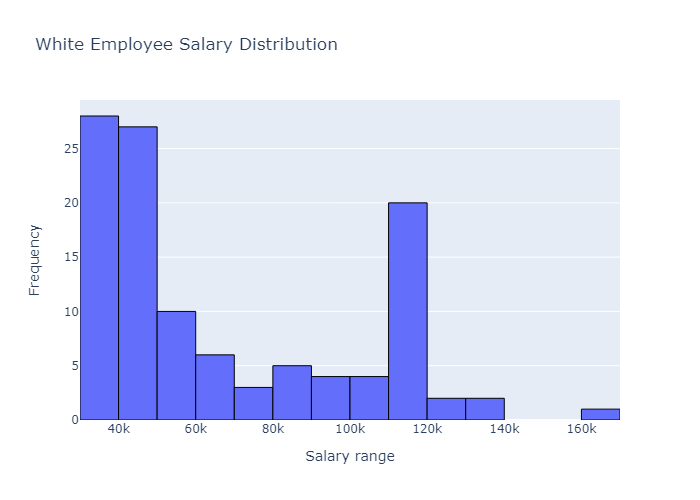

In [34]:
total_bins = 20
interval_range = (np.max(white_employees['Salary']) - np.min(white_employees['Salary']))/total_bins
print(f"Interval range: {interval_range}")

if mode == 'colab':
    configure_plotly_browser_state()
    
fig = go.Figure()
fig.add_trace(go.Histogram(x=white_employees['Salary'], nbinsx=total_bins,
                           name='Histogram', marker_line=dict(color='black', width=1)))

# Set the chart title and axis labels
fig.update_layout(title='White Employee Salary Distribution',
                  xaxis=dict(title='Salary range'),
                  yaxis=dict(title='Frequency'))


fig.show()

From the above dataset, we can see that :

- There are 112 white employees.

- Most white employees are paid annual salary that is less than $\$$ 50,000. 

- Only five employees are paid an annual salary greater than $\$$ 120,000. 

- The mean salary of white employees is $\$$ 70,917 and the standard deviation is $\$$ 35,000. 

If we take a look at the employees who get paid more than $\$$ 120,000, we can see:

In [35]:
white_employees[white_employees['Salary'] >= 120_000].sort_values(by=['Salary'], ascending=False).head(10)

,Surname,Name,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary,Unnamed: 10
106,Bold,Caroline,63.0,Female,United States,White,2012-07-02,Executive Office,President & CEO,166400.0,1
105,Zamora,Jennifer,38.0,Female,United States,White,2010-04-10,IT/IS,CIO,135200.0,1
98,Dougall,Eric,47.0,Male,United States,White,2014-01-05,IT/IS,IT Manager - Support,133120.0,1
99,Roup,Simon,44.0,Male,United States,White,2013-01-20,IT/IS,IT Manager - DB,128960.0,1
6,Houlihan,Debra,51.0,Female,United States,White,2014-05-05,Sales,Director of Sales,124800.0,1


We can see that the highest paid white employees are CEO, CIO, IT Manager, and Director of Sales.

### Task 2 - Analyze the dataset (Non-White employees)

In [36]:
nonwhite_employees = pd.read_excel('employee_salary.xlsx', sheet_name='Nonwhite').dropna(subset=['Salary'])
nonwhite_employees.info()
nonwhite_employees.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Surname      62 non-null     object        
 1   Name         62 non-null     object        
 2   Age          62 non-null     int64         
 3   Gender       62 non-null     object        
 4   Country      62 non-null     object        
 5   Ethnicity    62 non-null     object        
 6   Start_date   62 non-null     datetime64[ns]
 7   Department   62 non-null     object        
 8   Position     62 non-null     object        
 9   Salary       62 non-null     float64       
 10  Unnamed: 10  62 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 5.5+ KB


,Age,Salary,Unnamed: 10
count,62.000000,62.000000,62.0
mean,36.935484,70917.264516,0.0
std,7.531074,35000.713083,0.0
min,26.000000,29120.000000,0.0
25%,31.000000,45760.000000,0.0
50%,36.000000,53040.000000,0.0
75%,39.750000,114400.000000,0.0
max,59.000000,135200.000000,0.0


Interval range: 5304.0


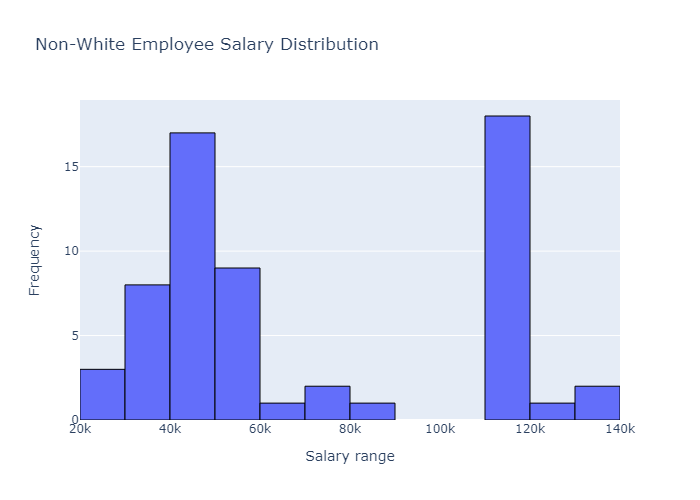

In [37]:
total_bins = 20
interval_range = (np.max(nonwhite_employees['Salary']) - np.min(nonwhite_employees['Salary']))/total_bins
print(f"Interval range: {interval_range}")

if mode == 'colab':
    configure_plotly_browser_state()
    
fig = go.Figure()
fig.add_trace(go.Histogram(x=nonwhite_employees['Salary'], nbinsx=total_bins,
                           name='Histogram', marker_line=dict(color='black', width=1)))

# Set the chart title and axis labels
fig.update_layout(title='Non-White Employee Salary Distribution',
                  xaxis=dict(title='Salary range'),
                  yaxis=dict(title='Frequency'))


fig.show()

From the above dataset, we can see that :

- There are 62 non-white employees.

- Most non-white employees are paid annual salary that is less than $\$$ 60,000. 

- Only three employees are paid an annual salary greater than $\$$ 120,000. 

- The mean salary of white employees is $\$$ 70,917 and the standard deviation is $\$$ 35,000. 

If we take a look at the employees who get paid more than $\$$ 120,000, we can see:

In [38]:
nonwhite_employees[nonwhite_employees['Salary'] >= 120_000].sort_values(by=['Salary'], ascending=False).head(22)

,Surname,Name,Age,Gender,Country,Ethnicity,Start_date,Department,Position,Salary,Unnamed: 10
43,Foss,Jason,37,Male,United States,Black or African American,2011-04-15,IT/IS,IT Director,135200.0,0
10,Monroe,Peter,31,Male,France,Hispanic,2012-02-15,IT/IS,IT Manager - Infra,131040.0,0
41,Bramante,Elisa,34,Female,United States,Black or African American,2009-01-05,Production,Director of Operations,124800.0,0


We can see that the highest paid white employees are IT Director, IT Manager, and Director of Operations.

### Task 3 - Comparison between the dataset

Mean: 68603.78, Median: 52000.00, Standard Deviation: 34023.35
Interval range: 6864.0


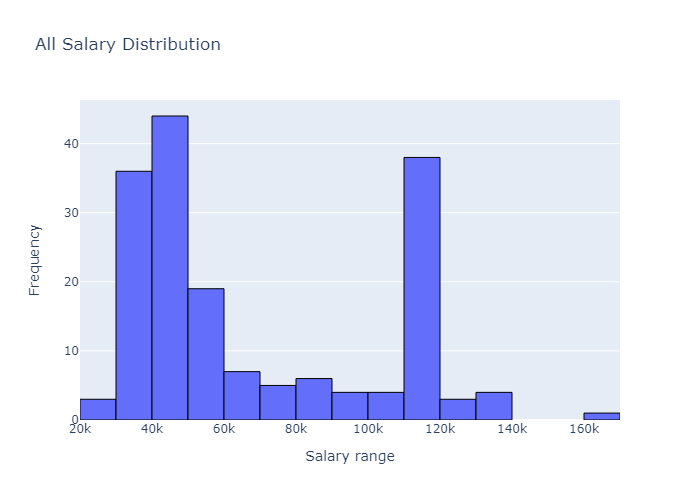

In [39]:
all_salaries = list(white_employees['Salary']) + list(nonwhite_employees['Salary'])
mean_salary = np.mean(all_salaries)
median_salary = np.median(all_salaries)
std_deviation_salary = np.std(all_salaries)

print(f"Mean: {mean_salary:.2f}, Median: {median_salary:.2f}, Standard Deviation: {std_deviation_salary:.2f}")

total_bins = 20
interval_range = (np.max(all_salaries) - np.min(all_salaries))/total_bins
print(f"Interval range: {interval_range}")

if mode == 'colab':
    configure_plotly_browser_state()
    
fig = go.Figure()
fig.add_trace(go.Histogram(x=all_salaries, nbinsx=total_bins,
                           name='Histogram', marker_line=dict(color='black', width=1)))

# Set the chart title and axis labels
fig.update_layout(title='All Salary Distribution',
                  xaxis=dict(title='Salary range'),
                  yaxis=dict(title='Frequency'))


fig.show()

- The mean salary of all employees is $\$$ 68603 and the median salary is $\$$ 52,000. Therefore, both white and non-white employees, on average are paid less than the mean salary. The graph is right-skewed.

- If we consider high salary as the salaries which are more than 1 standard deviation away from the mean, we can calculate the probability of getting paid high salary given that the employee is white and given that the employee is non-white.

- If we consider low salary as the salaries that are one standard deviation away to the left of the mean, we can calculate the probability of getting paid low salary given that the employee is white and non-white.

In [40]:
high_salary = mean_salary + std_deviation_salary
low_salary = mean_salary - std_deviation_salary

probability_high_salary_given_white = len(white_employees[white_employees['Salary'] > high_salary])/len(white_employees)
probability_low_salary_given_white = len(white_employees[white_employees['Salary'] < low_salary])/len(white_employees)
probability_high_salary_given_nonwhite = len(nonwhite_employees[nonwhite_employees['Salary'] > high_salary])/len(nonwhite_employees)
probability_low_salary_given_nonwhite = len(nonwhite_employees[nonwhite_employees['Salary'] < low_salary])/len(nonwhite_employees)

print(f"Probability of getting paid high salary given the employees are white is {probability_high_salary_given_white*100:.2f}%")
print(f"Probability of getting paid high salary given the employees are non-white is {probability_high_salary_given_nonwhite*100:.2f}%")
print("\n")
print(f"Probability of getting paid low salary given the employees are white is {probability_low_salary_given_white*100:.2f}%")
print(f"Probability of getting paid low salary given the employees are non-white is {probability_low_salary_given_nonwhite*100:.2f}%")

Probability of getting paid high salary given the employees are white is 24.11%
Probability of getting paid high salary given the employees are non-white is 33.87%


Probability of getting paid low salary given the employees are white is 12.50%
Probability of getting paid low salary given the employees are non-white is 11.29%


In [41]:
total_high_salary = len(np.where(all_salaries > high_salary)[0])
total_low_salary = len(np.where(all_salaries < low_salary)[0])
print(f"Total employees with high salary: {total_high_salary}")
print(f"Total employees with low salary: {total_low_salary}")


probability_white_given_high_salary = len(white_employees[white_employees['Salary'] > high_salary])/total_high_salary
probability_white_given_low_salary = len(white_employees[white_employees['Salary'] < low_salary])/total_low_salary

probability_nonwhite_given_high_salary = len(nonwhite_employees[nonwhite_employees['Salary'] > high_salary])/total_high_salary
probability_nonwhite_given_low_salary = len(nonwhite_employees[nonwhite_employees['Salary'] < low_salary])/total_low_salary

print(f"Probability of being white given the employee has high salary: {probability_white_given_high_salary*100:.2f}")
print(f"Probability of being non-white given the employee has high salary: {probability_nonwhite_given_high_salary*100:.2f}")
print("\n")
print(f"Probability of being white given the employee has low salary: {probability_white_given_low_salary*100:.2f}")
print(f"Probability of being non-white given the employee has low salary: {probability_nonwhite_given_low_salary*100:.2f}")


Total employees with high salary: 48
Total employees with low salary: 21
Probability of being white given the employee has high salary: 56.25
Probability of being non-white given the employee has high salary: 43.75


Probability of being white given the employee has low salary: 66.67
Probability of being non-white given the employee has low salary: 33.33


Therefore, even though there is a high probability that an employee will get high salary if they are non-white, currently among the people who are getting paid high salary, the number of white people is greater. Moreover, there is a lower probability that an employee will get low salary if they are non-white. Among the people who are getting paid low salary, the number of white employees are greater. This means that the number of white employees in the company is larger than that of non-white employees. Moreover, the company is moving to reduce pay gap between white and non-white employees.


### Task 5 - Hypothesis Testing (Standardization)

Since we know the population variance of the samples we may perform the Z-test.

The equation to calculate the Z-score of independent samples with known population variance is:

\begin{equation}
Z = \frac{\bar{x_D} - \mu_D}{\sqrt{\frac{\sigma^2_W}{n_W} + \frac{\sigma^2_N}{n_N}}}
\end{equation}

Here,
- $\bar{x_D}$ is equal to $\bar{x_W} - \bar{x_N}$

- $\mu_D$ is equal to $\mu_W - \mu_N$ which is equal to the estimated mean of our hypothesis i.e. 0.

- $\bar{x_W}$ and $\bar{x_N}$ are the sample mean of the salaries of white and non-white employees respectively.

- $\sigma^2_W$ and $\sigma^2_N$ are the population variance of the salaries of white and non-white employees respectively.

- $n_W$ and $n_N$ are the sample size of the salaries of white and non-white employees respectively.


In [42]:
alpha = 0.05
population_mean_of_interest = 0
population_variance_white = 1_136_728_018.03
population_variance_nonwhite = 1_225_049_916.30

sample_white_mean = np.mean(white_employees['Salary'])
sample_nonwhite_mean = np.mean(nonwhite_employees['Salary'])
print(f"Sample Mean - White: {sample_white_mean:.2f}, Non-white: {sample_nonwhite_mean:.2f}")

sample_white_std = np.std(white_employees['Salary'])
sample_nonwhite_std = np.std(nonwhite_employees['Salary'])
print(f"Sample standard deviation - White: {sample_white_std:.2f}, Non-white: {sample_nonwhite_std:.2f}")

sample_white_size = len(white_employees)
sample_nonwhite_size = len(nonwhite_employees)
print(f"Sample size - White: {sample_white_size}, Non-white: {sample_nonwhite_size}")


standard_error = np.sqrt( (population_variance_white/sample_white_size) + (population_variance_nonwhite/sample_nonwhite_size) )
print(f"Standard Error: {standard_error:.2f}")

z_score = ((sample_white_mean - sample_nonwhite_mean) - population_mean_of_interest)/standard_error
print(f"Z-Score is: {z_score}")

Sample Mean - White: 67323.10, Non-white: 70917.26
Sample standard deviation - White: 33564.54, Non-white: 34717.30
Sample size - White: 112, Non-white: 62
Standard Error: 5468.84
Z-Score is: -0.6572076630852737


### Task 6 - Hypothesis Testing (Compare Z-score with Critical Value)

Now we will calculate the critical value 'z' from the Z-statistics table using a significance level of 0.05. If the z-score is less than -z or greater than +z, then we will reject the null hypothesis. Otherwise, we will accept the null hypothesis. Since, this is a two-tailed test, the data from z-table will be calculated using $1-\frac{\alpha}{2}$.

**Note**

We use the absolute value $|Z|$ of the z-score instead of the actual value since some z-statistics tables do not contain data for negative values and it is easier to compare the positive values. So, if we use the absolute value to calculate the critical value, we can just check whether the z-score is greater than critical value and omit the test for negative range. That is because $-Z < -z$ is the same as $Z > z$

In [43]:
critical_value = stats.norm.ppf(1-alpha/2)

print(f"The critical value is {critical_value}")

accepted = np.abs(z_score) <= np.abs(critical_value)
result = "accept" if accepted else "reject"
result_range = "within" if accepted else "outside"
print(f"The z-score is {result_range} the range of critical value. So, with a significance level of {alpha*100}%, we {result} the null hypothesis")

The critical value is 1.959963984540054
The z-score is within the range of critical value. So, with a significance level of 5.0%, we accept the null hypothesis


Since the critical value is lower than the z-score we can accept the null hypothesis. Therefore, we can conclude that there is no pay gap between the employees based on ethnicity.

### Task 7 - Hypothesis Testing (P-Value)

The Z-score is -0.66. So, we find the cell whose sum of row and column header equal to the z-score. If we cannot find such value we pick the sum which is nearest to it. Let the value in the cell of the corresponding row and column be 'c'. The p-value is equal to $1-c*2$ since this is a two-sided test. For our case $c=0.2546$. So, the critical value is $1-0.2546*2 =0.491 $

Since the p-value is much greater than the significance level, we can conclude that - at all level of significance there is no pay gap between the employees based on ethnicity.

**References:**

1. [The Data Science Course: Complete Data Science Bootcamp](https://www.udemy.com/share/101W9c3@oEFxH6jfeF78cKv-RDiIPVbI_iJt7crj25dGEjsiIRt9MbSV8n50dmB7AlanMAikNg==/)

2. [Z-Table](https://byjus.com/maths/z-score-table/)

3. [T-Table](https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf)